i built the simple  project to answer below question 
1. how we can predict house price?, what is aspect correlate well with house price?
2. is Neighborhood affect the price?
3. what is the house price for large and small Lot area


In [1]:
# first we import necessary libraries, any new libraries we need while we working will be added below
    
#data base library
import pandas as pd
import numpy as np
# data Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# (AI, Test, Models) Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv') #loud data into df

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### A. Lot area

[(0.0, 400000.0), (0.0, 20000.0)]

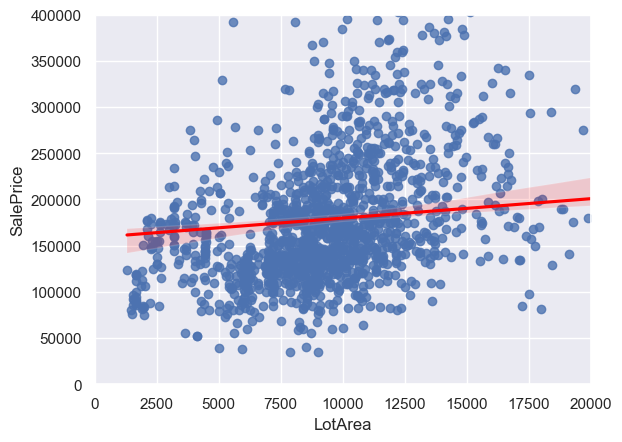

In [4]:
# make plot between SalePrice & LotArea to check if there is any relationship 
sns.set()# just to set seaborn default theme
Price_Lot= df[['SalePrice','LotArea']] # select SalePrice & LotArea in assign it to data


fig = sns.regplot(data=Price_Lot, x='LotArea', y = 'SalePrice', line_kws={"color": "red"}) #linear regression
fig.set(ylim = (0,400000), xlim=(0, 20000))


as shown on above plot there is *very very*
small positive linear relationship if we let x be 'SalePrice'\
let us see what is the magnitude of this relationship


In [5]:
df[['SalePrice','LotArea']].corr()# calculate the coefficient using method corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


the <mark> Pearson correlation</mark> between SalePrice And LotArea  is **0.26** which is low degree correlation, therefore if Lot Area  increased doesn't mean the price of house will go up, but that not always True for example for all Lot Areas that are below 8000 sq. ft. the price is below 300,000. In this area  linear relationship is noticeable in low LotArea *as shown Below*


In [6]:
index_Lot = df[df["LotArea"]<20000]
index_Lot[['SalePrice', 'LotArea']].corr()

,SalePrice,LotArea
SalePrice,1.000000,0.418753
LotArea,0.418753,1.000000


but in general the difference of price of large and small Lot area is very small
\
It make sense since large or small Lot not important as Neighborhood or furniture quality

### B. Neighborhood/District 

When it come to variables affecting the house price, I think neighborhood is really important every city in the world have high status neighborhoods where and low status neighborhoods 
\
Let us see if neighborhoods affect the house price using boxplot


below picture will give us intuition about **Box Plot**
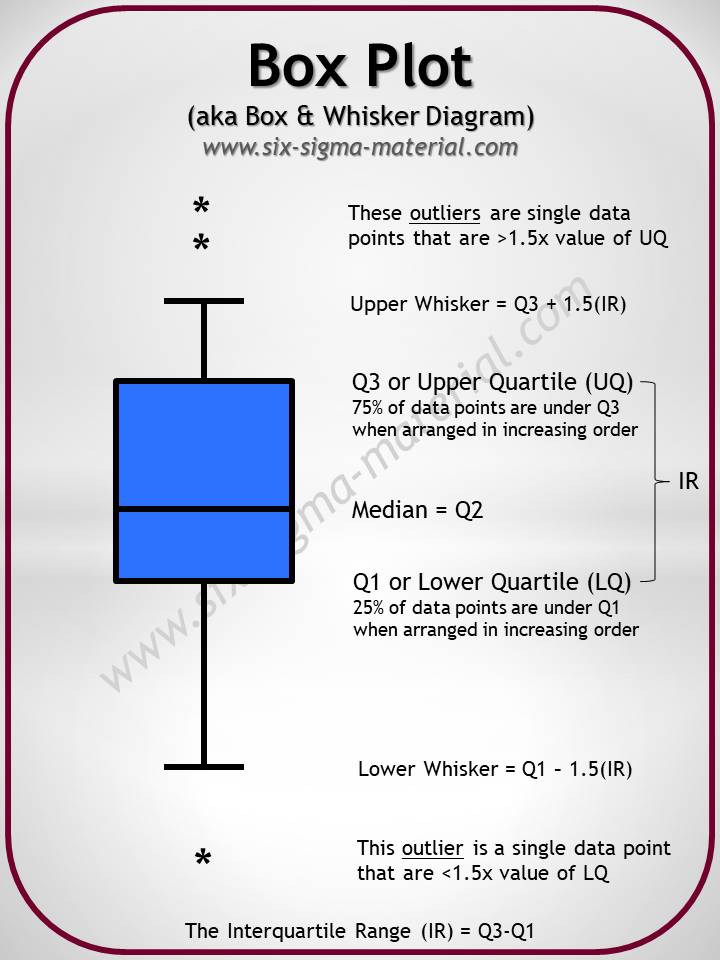

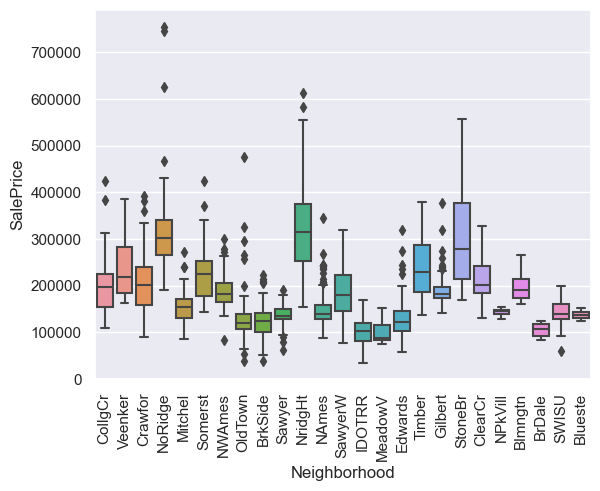

In [7]:
fig2 = sns.boxplot(data = df, x= 'Neighborhood', y='SalePrice')# plot the DF

plt.xticks(rotation=90)# change rotation of x_axis
plt.show()

Index(['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr',
       'Somerst', 'Veenker', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge'],
      dtype='object', name='Neighborhood')


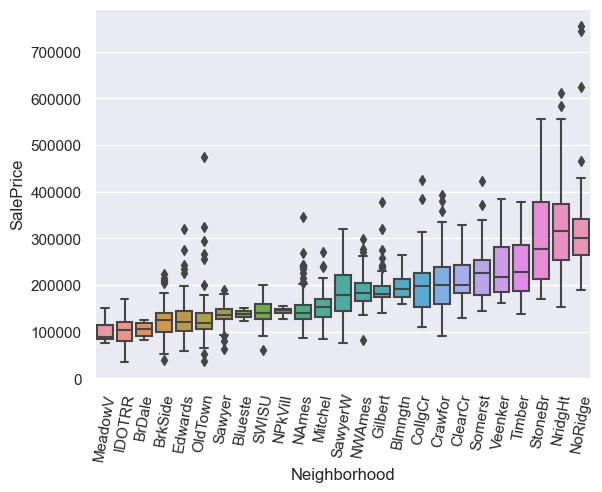

In [8]:
# just to sort neighborhoods by Sale Price AVG 
# first we need to find current of Neighborhood

df_sorted_Neigh = df.groupby('Neighborhood').mean()['SalePrice'].sort_values().index# group DF by Neighborhoods then calculate mean and select 'Sale Price'column then sort the values and getindex wich is the sorted neighborhoods
print(df_sorted_Neigh)
fig3 = sns.boxplot(data=df, x='Neighborhood', y='SalePrice', order=df_sorted_Neigh)# plot orignal DF BUT set Order to to df_sorted_Neigh
plt.xticks(rotation =80)
plt.show()

we can see that **NoRidge, NridgHt and StoneBr** have the highest average price and highest minimum price compared to other Neighborhood and highest maximum price
\
on other hand **MeadowV, IDOTRR and BrDale** have lowest average price and lowest minimum price.
\
therefor depending on neighborhood prices will change drastically.


### C. Data Preparation
- first we delete all columns that are missing more than 40% of their data, because i think i can't use these columns to predeict SalePrice

In [9]:
na_mean = df.isna().mean() # find the mean values of the columns in the DF
col = na_mean[na_mean>.4].index # get the columns using index

df = df.drop(columns = col)# delete all columns wich assigned to col
print('columns that are missing more than 40% of their values:',col)
df.columns

columns that are missing more than 40% of their values: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

- we will use only numerical Features, so we should delete all categorical Features

In [10]:
df_O_col = df.select_dtypes(include = 'O').columns # find Object data type
df = df.drop(columns =df_O_col) #deleting categorical Variables
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

- find missing data in Features

In [11]:
df_na = df.isna().sum().sort_values(ascending = False ) 
df_na[df_na > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

- in case of LotFrontage and MasVnrArea we will fill NA with the average

In [12]:
df_fill = df.fillna(df[['LotFrontage', 'MasVnrArea']].mean()) # i used method 'fillna' inside parameters i selected variable that i want to fill and calculate mean at the same time 

- First we will check if garage built year is the same as house built year, because usually houses is built with their garages  

In [13]:
print((df['YearBuilt'] == df['GarageYrBlt']).value_counts()) # using boolean to count how many garages that was build at the same year
(df['YearBuilt'] == df['GarageYrBlt']).mean()# Percentage 

True     1089
False     371
dtype: int64


0.7458904109589041

- since 74.5% of garage year built is the same as house year built then we will fill NA with same house year built for each row
\
Note: if we'd delete NA from 'GarageYrBlt' and Recalculate, the percentage will be 78.9% wich mean most of Falses count is from NA Values

In [14]:
values = {'GarageYrBlt':df['YearBuilt']} # make dic with key GarageYrBlt and values equal to column YearBuilt
df_fill = df.fillna(value = values)# using method fillna it will replace NA with values in YearBuilt on tha same index
df_fill['GarageYrBlt'].isna().value_counts()# check if there still any NA values

False    1460
Name: GarageYrBlt, dtype: int64

- Using Pearson correlation we will try to find features that have a good measure of **linear Relationship** (variables most correlated with 'SalePrice'.)



In [15]:
corr_10 = df_fill.corr()['SalePrice'].sort_values(ascending = False).head(10)# apply correlation method to the DF then select SalePrice columns, sort the values of coefficients tne select the top 10 and assign it to corr_10
print('top 10 with most high coefficient to Sale Price:\n', corr_10)
corr_10_col = corr_10.index # store the columns to corr_10_col
corr_10_col

top 10 with most high coefficient to Sale Price:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

- we plot heatmap, it help us to find correlation values between the features (variables)

Note: We cannot plot the heat map using the series above it **need 2D array**, so I will calculate the coefficients using **numpy**,then we plot heat map

<Axes: >

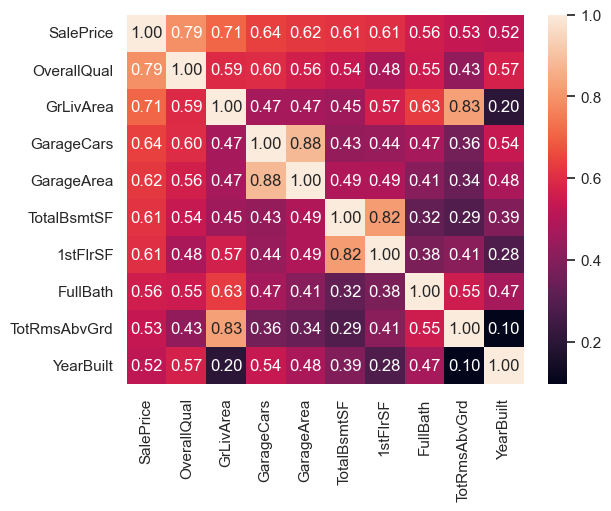

In [16]:
corr_10_np = np.corrcoef(df[corr_10_col], rowvar=False)#using np corrcoef we calculate the coefficient of selected columns
sns.heatmap(corr_10_np, annot=True,fmt ='.2f', yticklabels = corr_10_col, xticklabels = corr_10_col)# Plot heat map

### D. Modeling & Evaluation
in this section  we will split Data into Train and Test sets, then fit the model

In [17]:
X = df_fill[corr_10_col].drop(columns = 'SalePrice')# select all columns in 'corr_10_col' then drop 'SalePrice' and Assign rest of columns to X
Y = df_fill[['SalePrice']]# select Sale Price then assign it to Y
print('df_xtrain:\n',X.columns, '\ndf_df_ytrain:\n', Y.columns)

df_xtrain:
 Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object') 
df_df_ytrain:
 Index(['SalePrice'], dtype='object')


In [18]:
x_train, x_tset, y_train, y_test = train_test_split(X,Y, test_size = .30, random_state=42)# split the Data

In [19]:
#learning Model
Lr_model = LinearRegression()

In [20]:
# fitl the model to test Data
Lr_model.fit(x_train,y_train)

LinearRegression()

In [21]:
#predict the test set
y_test_predict = Lr_model.predict(x_tset)

In [22]:
#evaluate the prediction
r2_score(y_test, y_test_predict)

0.7984740518243119